# Explore Lesson
Code Along

import hiku

In [ ]:
import pandas as pd
from wrangle import wrangle_grades
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split

In [ ]:
# sets defaults for matplotlib figures
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))


In [ ]:
df = wrangle_grades()

In [ ]:
df.head()

In [ ]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)
train.shape, validate.shape, test.shape

## Continuous and Continuous

In [ ]:
train.head()
# goal is to predict final grade based on score of 3 previous exams

In [ ]:
sns.jointplot(x='exam1', y='final_grade', data=train)

In [ ]:
sns.jointplot(x='exam2', y='final_grade', data=train)

In [ ]:
sns.jointplot(x='exam3', y='final_grade', data=train)

In [ ]:
sns.pairplot(train)

In [ ]:
g = sns.PairGrid(train) # basically a pairplot but with customizations
# can specify any two functions we want for visualiztions
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of 2 variables

In [ ]:
train.corr()

In [ ]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways: 

- exam 2 has least correlation with final grade, but is still a strong correlation
- exam 1 has strongest correlation

Questions:
- why does exam 2 have a lower correlation?
    - students are slacking midsemester
    - the material covered on the final isn't the same as what is covered in exam 2
    - the material covered midsemester is harder

## Continuous and Categorical

In [ ]:
# turn an exam into a letter grade
train.head()

In [ ]:
pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['F', 'C', 'B', 'A']).value_counts()

In [ ]:
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 100], labels=['F', 'C', 'B', 'A'])

In [ ]:
train.head()

Viz types for continuous x categorical
- boxplot
- bar chart
- violin
- swarplot

In [ ]:
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:
- students with F not only have lowest grade, but also the most variation in grades
    - maybe this is due to different study habits or workflows?

In [ ]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.ylabel('# of students')
plt.title('Exam1 Letter Grades')
plt.xticks(rotation=0)

In [ ]:
# fake some data for demonstration and practice with numpy
# make fake category
np.random.seed(123)
train['classroom'] = np.random.choice(['One', 'Two',], train.shape[0])

In [ ]:
# train.shape[0] in above tells python to give us the same number of results as rows in the train dataframe
train.head()

In [ ]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0, 100)

In [ ]:
sns.barplot(data=train, y='final_grade', x='exam1_letter_grade', hue='classroom')
plt.ylim(0, 100)

Takeaway: no real difference between classroom 1 and 2   
- so classroom doesn't have an effect on final grade?
- run a hypothesis test to confirm

- $H_0$: there is no difference in final grade between classroom 1 and classroom 2
- $H_0$: there is a difference in final grade between classroom 1 and classroom 2

In [ ]:
alpha = .05
from scipy import stats

stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade, 
    equal_var=False,
)

with a p = .025, so we reject the null hypothesis   

p-value = P(observe our data due to chance | Ho=True)   

results suggest that with random seed 123 we are seeing this result due to chance.  

with a random seed 125 p=.25   
if get unexpected result probably want to double check by varying the random seed

REMEMBER: statistical significance is not business significance

In [ ]:
# swarmplot shows how many data points fall within a given category
# doesn't work well for extremely large datasets, computationally expensive
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

In [ ]:
sns.violinplot(data=train, y='final_grade', x='classroom')

In [ ]:
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)


## Categorical and Categorical

In [ ]:
train.head()

In [ ]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

In [ ]:
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [ ]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns')
# columns sum to 1

In [ ]:
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='index')
# rows sum to 1

# Exercises

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).

1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. 

For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

Added exercises after I copied

Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

Explore your dataset with any other visualizations you think will be helpful.

In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [1]:
import wrangle
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split

In [2]:
train, validate, test = wrangle.wrangle_telco()
train.shape, validate.shape, test.shape

((1224, 7), (216, 7), (255, 7))

In [3]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled
1540,9084-OAYKL,20.80,58,1212.25,0.022455,0.139782,0.805556
1187,7036-TYDEC,104.00,69,7028.50,0.852794,0.810440,0.958333
1106,6625-FLENO,20.75,58,1185.95,0.021956,0.136749,0.805556
909,5485-ITNPC,85.90,66,5595.30,0.672156,0.645181,0.916667
1271,7569-NMZYQ,118.75,72,8672.45,1.000000,1.000000,1.000000


In [4]:
# 1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along 
# with the regression line for each pair.
def plot_variable_pairs(df):
    g = sns.PairGrid(df) 
    g.map_diag(sns.distplot)
    g.map_offdiag(sns.regplot)


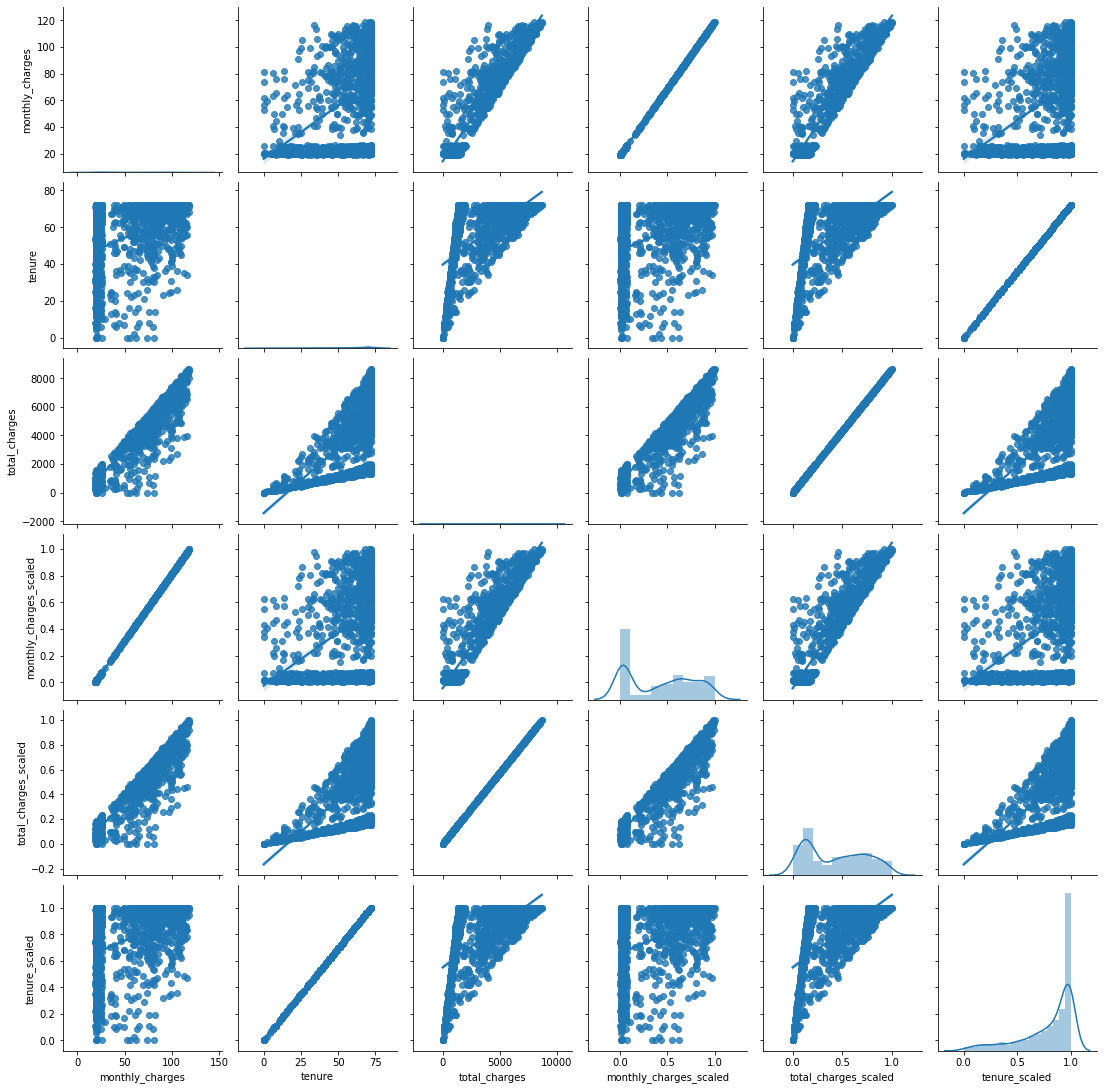

In [5]:
plot_variable_pairs(train)

In [14]:
# 2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new 
# feature tenure_years, in complete years as a customer.

def months_to_years(tenure_months, df):
    df['tenure_years'] = round(tenure_months/12, 0)
    return df


In [15]:
months_to_years(train.tenure, train)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,total_charges_scaled,tenure_scaled,tenure_years
1540,9084-OAYKL,20.80,58,1212.25,0.022455,0.139782,0.805556,5.0
1187,7036-TYDEC,104.00,69,7028.50,0.852794,0.810440,0.958333,6.0
1106,6625-FLENO,20.75,58,1185.95,0.021956,0.136749,0.805556,5.0
909,5485-ITNPC,85.90,66,5595.30,0.672156,0.645181,0.916667,6.0
1271,7569-NMZYQ,118.75,72,8672.45,1.000000,1.000000,1.000000,6.0
...,...,...,...,...,...,...,...,...
1578,9339-FIIJL,85.95,72,6151.90,0.672655,0.709361,1.000000,6.0
1043,6295-OSINB,109.65,72,7880.25,0.909182,0.908653,1.000000,6.0
1378,8152-VETUR,97.70,72,6869.70,0.789920,0.792129,1.000000,6.0
596,3612-YUNGG,109.20,64,6741.15,0.904691,0.777306,0.888889,5.0


In [ ]:
# 3. Write a function, plot_categorical_and_continuous_vars(categorical_var, continuous_var, df), 
# that outputs 3 different plots for plotting a categorical variable with a continuous variable, 
# e.g. tenure_years with total_charges
#train['tenure_cat'] = pd.cut(train.tenure_years, bins=[0, 1, 2, 4, 6], labels=['1', '2', '3-4', '5-6'])

    

In [29]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
        plt.rc('font', size=13)
        plt.rc('figure', figsize=(13, 7))
        plt.subplot(311)
        sns.boxplot(data=df, y=continuous_var, x=categorical_var)
        plt.subplot(312)
        sns.violinplot(data=df, y=continuous_var, x=categorical_var)
        plt.subplot(313)
        sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
        plt.tight_layout()
        plt.show()

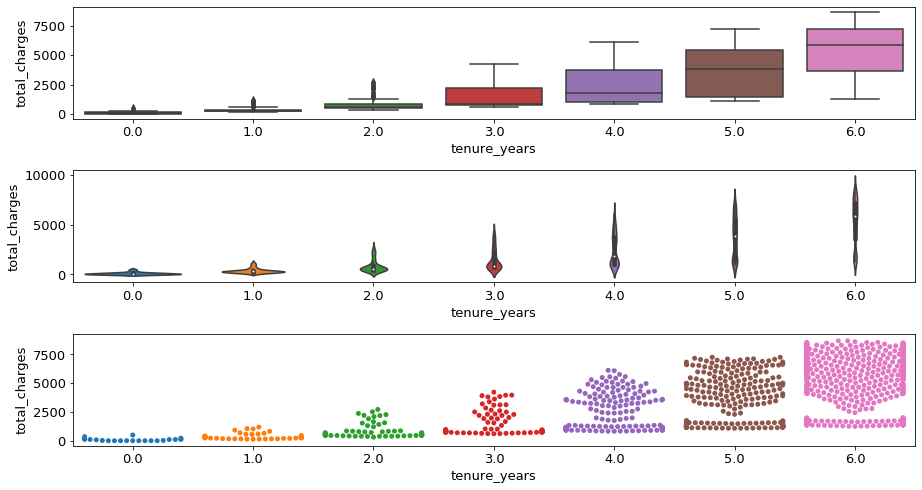

In [31]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', train)

In [32]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    plt.rc('font', size=13)
    plt.rc('figure', figsize=(13, 7))
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()   
    sns.violinplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.swarmplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()

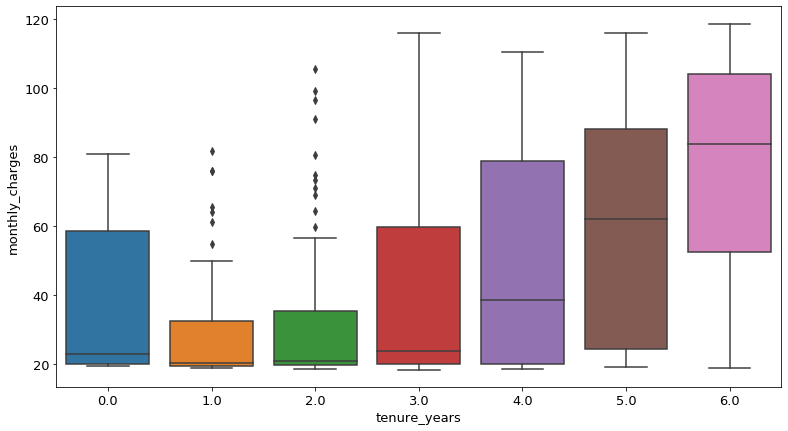

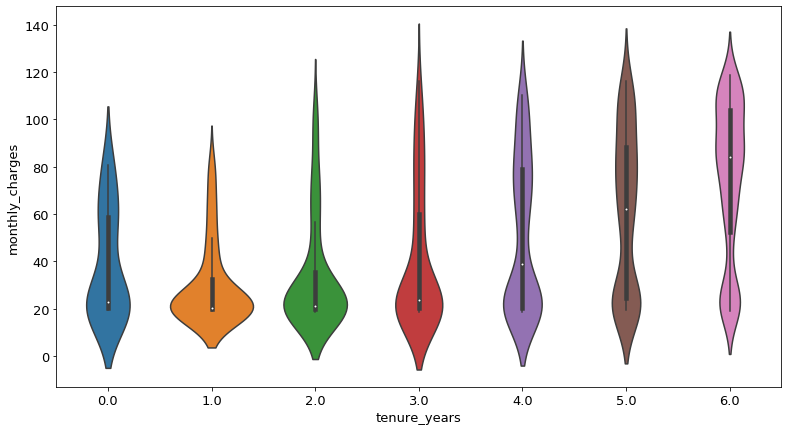

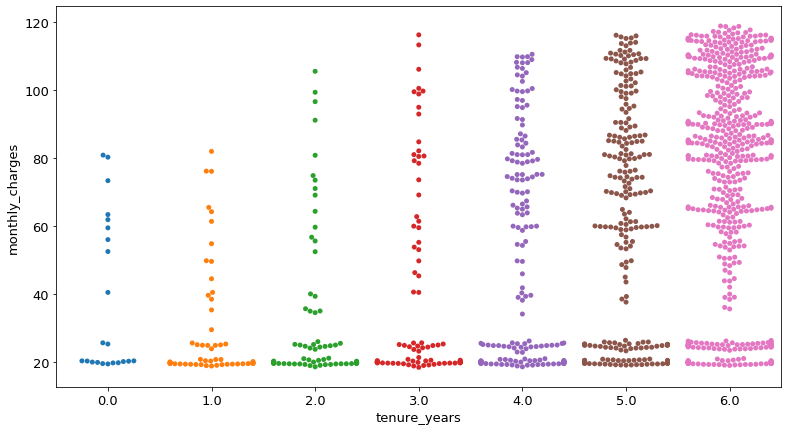

In [34]:
plot_categorical_and_continuous_vars('tenure_years', 'monthly_charges', train)